In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 간단한 시계열 데이터 만들기

* 정상시계열(우연 변동 시계열)


In [6]:
dd = np.array([1342, 1442, 1252, 1343, 1425, 1362, 1256, 1272, 1243, 1359, 1412, 1253, 1201, 1478, 1322, 1406, 1254, 1289, 1497, 1208]).reshape(5,4)
dd

array([[1342, 1442, 1252, 1343],
       [1425, 1362, 1256, 1272],
       [1243, 1359, 1412, 1253],
       [1201, 1478, 1322, 1406],
       [1254, 1289, 1497, 1208]])

In [7]:
dd_ts = pd.DataFrame(dd, index=range(2016,2021), columns=['Qt1','Qt2','Qt3','Qt4'])
dd_ts

,Qt1,Qt2,Qt3,Qt4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


데이터프레임 dd_ts의 행과 열을 stack(스택)방식으로 변환하기 인덱스 초기화

In [8]:
dd_ts.stack()

2016  Qt1    1342
      Qt2    1442
      Qt3    1252
      Qt4    1343
2017  Qt1    1425
      Qt2    1362
      Qt3    1256
      Qt4    1272
2018  Qt1    1243
      Qt2    1359
      Qt3    1412
      Qt4    1253
2019  Qt1    1201
      Qt2    1478
      Qt3    1322
      Qt4    1406
2020  Qt1    1254
      Qt2    1289
      Qt3    1497
      Qt4    1208
dtype: int32

In [9]:
dd_ts = dd_ts.stack().reset_index()
dd_ts

,level_0,level_1,0
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1343
4,2017,Qt1,1425
5,2017,Qt2,1362
6,2017,Qt3,1256
7,2017,Qt4,1272
8,2018,Qt1,1243
9,2018,Qt2,1359


In [10]:
dd_ts.columns = ['year', 'quarter', 'value']
dd_ts

,year,quarter,value
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1343
4,2017,Qt1,1425
5,2017,Qt2,1362
6,2017,Qt3,1256
7,2017,Qt4,1272
8,2018,Qt1,1243
9,2018,Qt2,1359


In [11]:
dd_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     int64 
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [12]:
dd_ts['year'] = dd_ts['year'].apply(str)
dd_ts['year'].dtype

dtype('O')

In [13]:
dd_ts['date'] = dd_ts['year'] + dd_ts['quarter']

In [14]:
dd_ts['date'] = dd_ts['date'].str.replace("t","")
dd_ts['date']

0     2016Q1
1     2016Q2
2     2016Q3
3     2016Q4
4     2017Q1
5     2017Q2
6     2017Q3
7     2017Q4
8     2018Q1
9     2018Q2
10    2018Q3
11    2018Q4
12    2019Q1
13    2019Q2
14    2019Q3
15    2019Q4
16    2020Q1
17    2020Q2
18    2020Q3
19    2020Q4
Name: date, dtype: object

date 컬럼을 분기(quarter) 주기로 변환 후 타임스탬프 형식으로 변경

In [16]:
dd_ts['date'] = pd.PeriodIndex(dd_ts['date'], freq='Q').to_timestamp()
dd_ts

,year,quarter,value,date
0,2016,Qt1,1342,2016-01-01
1,2016,Qt2,1442,2016-04-01
2,2016,Qt3,1252,2016-07-01
3,2016,Qt4,1343,2016-10-01
4,2017,Qt1,1425,2017-01-01
5,2017,Qt2,1362,2017-04-01
6,2017,Qt3,1256,2017-07-01
7,2017,Qt4,1272,2017-10-01
8,2018,Qt1,1243,2018-01-01
9,2018,Qt2,1359,2018-04-01


In [17]:
dd_ts = dd_ts.set_index('date')
dd_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qt1,1342
2016-04-01,2016,Qt2,1442
2016-07-01,2016,Qt3,1252
2016-10-01,2016,Qt4,1343
2017-01-01,2017,Qt1,1425
2017-04-01,2017,Qt2,1362
2017-07-01,2017,Qt3,1256
2017-10-01,2017,Qt4,1272
2018-01-01,2018,Qt1,1243


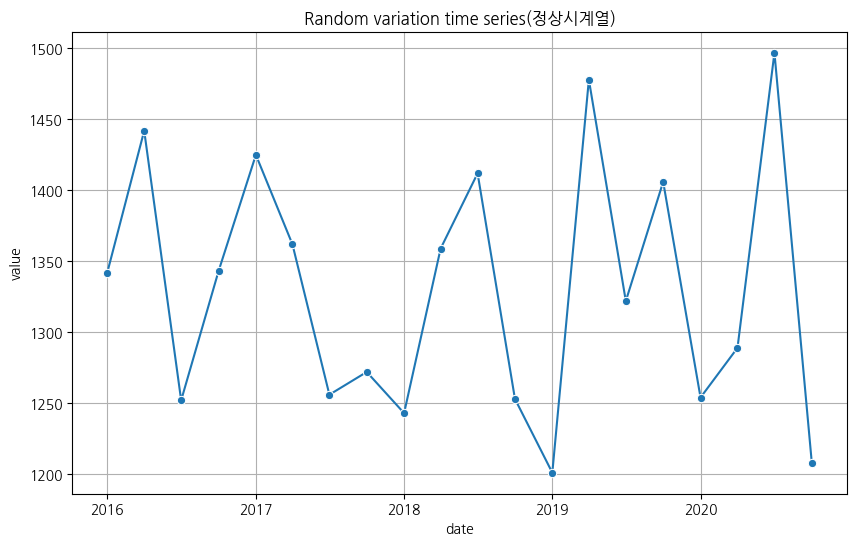

In [20]:
# 시계열 데이터 시각화
plt.figure(figsize=(10,6))
sns.lineplot(x=dd_ts.index, y=dd_ts['value'], marker='o')
plt.title("Random variation time series(정상시계열)")
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등이 위와같은 성향을 갖는다.